Integrantes:
*   Gabriel Bianchi e Silva - RA: 140399
*   Miguel Silva Taciano - RA: 140756

Este projeto tem por objetivo simular o modelo SIR em redes, tomando como base o projeto 5, apenas alterando ele, para se ter as ligações mostradas na figura a seguir, que tenta simular ligações parecidas com as da vida real.

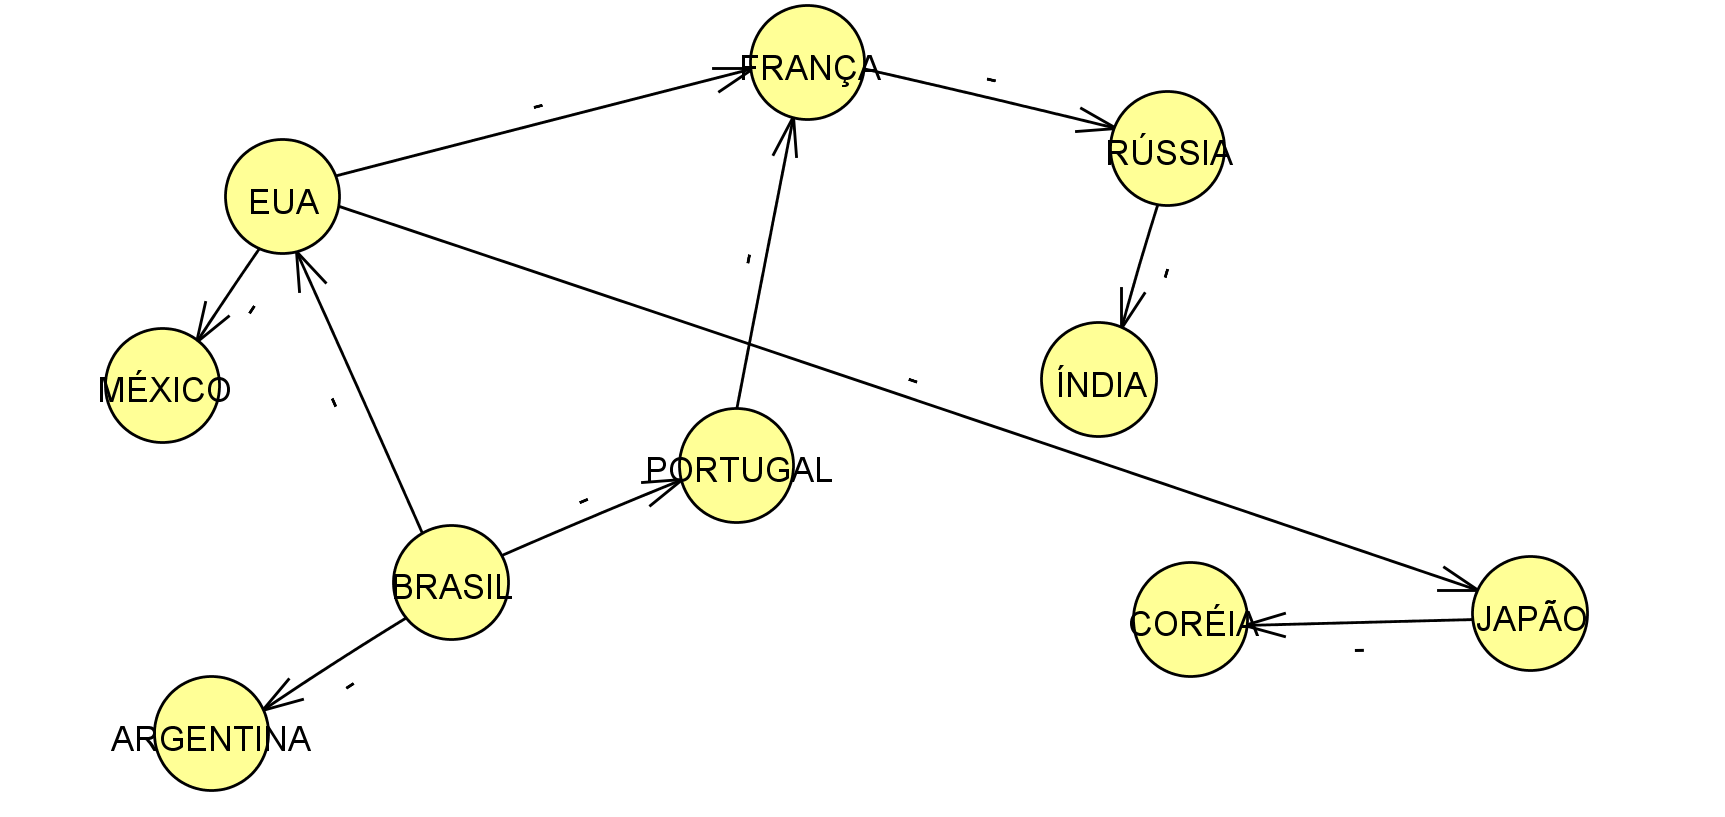

In [ ]:
import matplotlib.pyplot as plt
import random as rand

A seguir foram definidos valores para as interligações de cada país, de maneira a se assemelhar com possíveis relações reais, por exemplo de maior ligação entre os EUA com o México do que com a França. As probabilidades só serão utilizadas na segunda simulação, então são todas 1 no início.

In [ ]:
# Ligações entre as cidades, organizadas em uma lista
lig = {
    "jba": 0.1,
    "jbe": 0.3,
    "jbp": 0.12,
    "jem": 0.33,
    "jef": 0.18,
    "jej": 0.1,
    "jpf": 0.35,
    "jfr": 0.26,
    "jri": 0.31,
    "jjc": 0.33 
}
# Probabilidades de infecção entre cidades, também organizadas em uma lista
prob = {
    "jba": 1,
    "jbe": 1,
    "jbp": 1,
    "jem": 1,
    "jef": 1,
    "jej": 1,
    "jpf": 1,
    "jfr": 1,
    "jri": 1,
    "jjc": 1, 
}
a = 1 / 15
dT = 0.01
T = 30000

Foi criada a classe Covid, com as funções de dS, dI e dR, mas com valores genéricos, que serão colocados posteriormente para cada país, seguindo o modelo determinado mais acima.

In [ ]:
class Covid:
    def __init__(self, pop, infec, rCons, nome):
        self.nome = nome
        self.S = [pop]
        self.I = [infec]
        self.R = [0]
        self.rCons = rCons
        self.dS = [0]
        self.dI = [0]
        self.dR = [0]
        self.ro = [(rCons * self.S[0] / a)]

    def deltaS(self, *valores, funcao):
        dSAtual = funcao(*valores[1:], s=valores[0]) * dT
        self.dS.append(abs(dSAtual))
        self.S.append(valores[0] + dSAtual)

        self.ro.append(self.rCons * valores[0] / a)

    def deltaI(self, *valores, funcao):
        dIAtual = funcao(*valores[1:], s=valores[0]) * dT
        self.dI.append(abs(dIAtual))
        self.I.append(valores[1] + dIAtual)

    def deltaR(self, *valores, funcao):
        dRAtual = funcao(*valores) * dT
        self.dR.append(abs(dRAtual))
        self.R.append(valores[1] + dRAtual)

A taxa r foi colocada de maneira a representar a infecção sendo maior em países com maior população.

In [ ]:
# Inicializando as cidades
c1 = Covid(200000000, 1, 0.85*10**-9, "Brasil") # Brasil
c2 = Covid(120000000, 0, 0.6*10**-9, "Japão") # Japão
c3 = Covid(320000000, 0, 0.92*10**-9, "EUA") # EUA
c4 = Covid(45000000, 0, 0.4*10**-9, "Argentina")  # Argentina
c5 = Covid(127000000, 0, 0.7*10**-9, "México") # México
c6 = Covid(10000000, 0, 0.38*10**-9, "Portugal")  # Portugal
c7 = Covid(51000000, 0, 0.3*10**-9, "Coréia do Sul")  # Coréia do Sul
c8 = Covid(67000000, 0, 0.42*10**-9, "França")  # França
c9 = Covid(144000000, 0, 0.68*10**-9, "Rússia") # Rússia
c10 = Covid(1300000000, 0, 0.99*10**-9, "Índia") # Índia

E, as fórmulas de cada país foi feita abaixo, já colocando os valores das ligações(e a probabilidade 1). A primeira é a do dS, a segunda do dI e a última é a do dR.

In [ ]:
# Formulas de cada cidade
fc1 = [ 
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jba"]*prob["jba"]) + (i[2]*lig['jbe']*prob['jbe']) + (i[3]*lig["jbp"]*prob["jbp"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jba"]*prob["jba"]) + (i[2]*lig['jbe']*prob['jbe']) + (i[3]*lig["jbp"]*prob["jbp"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc2 = [
    lambda *i, s: (-c2.rCons * s * (i[0] + (i[1]*lig["jej"]*prob["jej"]) + (i[2]*lig["jej"]*prob["jej"]))),
    lambda *i, s: (c2.rCons * s * (i[0] + (i[1]*lig["jej"]*prob["jej"]) + (i[2]*lig["jej"]*prob["jej"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc3 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jem"]*prob["jem"]) + (i[2]*lig["jbe"]*prob["jbe"]) + (i[3]*lig["jef"]*prob["jef"]) + (i[4]*lig["jej"]*prob["jej"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jem"]*prob["jem"]) + (i[2]*lig["jbe"]*prob["jbe"]) + (i[3]*lig["jef"]*prob["jef"]) + (i[4]*lig["jej"]*prob["jej"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc4 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jba"]*prob["jba"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jba"]*prob["jba"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc5 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jem"]*prob["jem"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jem"]*prob["jem"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc6 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jbp"]*prob["jbp"]) + (i[2]*lig["jpf"]*prob["jpf"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jbp"]*prob["jbp"]) + (i[2]*lig["jpf"]*prob["jpf"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc7 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jjc"]*prob["jjc"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jjc"]*prob["jjc"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc8 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jef"]*prob["jef"]) + (i[2]*lig["jpf"]*prob["jpf"]) + (i[3]*lig["jfr"]*prob["jfr"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jef"]*prob["jef"]) + (i[2]*lig["jpf"]*prob["jpf"]) + (i[3]*lig["jfr"]*prob["jfr"])) - a * i[0]),
    lambda i, r: (a * i),
]

fc9 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jfr"]*prob["jfr"] + (i[2]*lig["jri"]*prob["jri"])))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jfr"]*prob["jfr"] + (i[2]*lig["jri"]*prob["jri"]))) - a * i[0]),
    lambda i, r: (a * i),
]

fc10 = [
    lambda *i, s: (-c1.rCons * s * (i[0] + (i[1]*lig["jri"]*prob["jri"]))),
    lambda *i, s: (c1.rCons * s * (i[0] + (i[1]*lig["jri"]*prob["jri"])) - a * i[0]),
    lambda i, r: (a * i),
]

Simulação:

In [ ]:
for i in range(T):
    sAtual = [c1.S[i], c2.S[i], c3.S[i], c4.S[i], c5.S[i], c6.S[i], c7.S[i], c8.S[i], c9.S[i], c10.S[i]]
    iAtual = [c1.I[i], c2.I[i], c3.I[i], c4.I[i], c5.I[i], c6.I[i], c7.I[i], c8.I[i], c9.I[i], c10.I[i]]
    rAtual = [c1.R[i], c2.R[i], c3.R[i], c4.R[i], c5.R[i], c6.R[i], c7.R[i], c8.R[i], c9.R[i], c10.R[i]]

    # Brasil
    c1.deltaS(sAtual[0], iAtual[0], iAtual[3], iAtual[2], iAtual[5], funcao=fc1[0])
    c1.deltaI(sAtual[0], iAtual[0], iAtual[3], iAtual[2], iAtual[5], funcao=fc1[1])
    c1.deltaR(iAtual[0], rAtual[0], funcao=fc1[2])

    # Japão
    c2.deltaS(sAtual[1], iAtual[1], iAtual[2], iAtual[6], funcao=fc2[0])
    c2.deltaI(sAtual[1], iAtual[1], iAtual[2], iAtual[6], funcao=fc2[1])
    c2.deltaR(iAtual[1], rAtual[1], funcao=fc2[2])

    # EUA
    c3.deltaS(sAtual[2], iAtual[2], iAtual[4], iAtual[0], iAtual[7], iAtual[1], funcao=fc3[0])
    c3.deltaI(sAtual[2], iAtual[2], iAtual[4], iAtual[0], iAtual[7], iAtual[1], funcao=fc3[1])
    c3.deltaR(iAtual[2], rAtual[2], funcao=fc3[2])

    # Argentina
    c4.deltaS(sAtual[3], iAtual[3], iAtual[0], funcao=fc4[0])
    c4.deltaI(sAtual[3], iAtual[3], iAtual[0], funcao=fc4[1])
    c4.deltaR(iAtual[3], rAtual[3], funcao=fc4[2])

    # México
    c5.deltaS(sAtual[4], iAtual[4], iAtual[2], funcao=fc5[0])
    c5.deltaI(sAtual[4], iAtual[4], iAtual[2], funcao=fc5[1])
    c5.deltaR(iAtual[4], rAtual[4], funcao=fc5[2])

    # Portugal
    c6.deltaS(sAtual[5], iAtual[5], iAtual[0], iAtual[7], funcao=fc6[0])
    c6.deltaI(sAtual[5], iAtual[5], iAtual[0], iAtual[7], funcao=fc6[1])
    c6.deltaR(iAtual[5], rAtual[5], funcao=fc6[2])

    # Coréia do Sul
    c7.deltaS(sAtual[6], iAtual[6], iAtual[1], funcao=fc7[0])
    c7.deltaI(sAtual[6], iAtual[6], iAtual[1], funcao=fc7[1])
    c7.deltaR(iAtual[6], rAtual[6], funcao=fc7[2])

    # França
    c8.deltaS(sAtual[7], iAtual[7], iAtual[2], iAtual[5], iAtual[8], funcao=fc8[0])
    c8.deltaI(sAtual[7], iAtual[7], iAtual[2], iAtual[5], iAtual[8], funcao=fc8[1])
    c8.deltaR(iAtual[7], rAtual[7], funcao=fc8[2])

    # Rússia
    c9.deltaS(sAtual[8], iAtual[8], iAtual[7], iAtual[9], funcao=fc9[0])
    c9.deltaI(sAtual[8], iAtual[8], iAtual[7], iAtual[9], funcao=fc9[1])
    c9.deltaR(iAtual[8], rAtual[8], funcao=fc9[2])

    # Índia
    c10.deltaS(sAtual[9], iAtual[9], iAtual[8], funcao=fc10[0])
    c10.deltaI(sAtual[9], iAtual[9], iAtual[8], funcao=fc10[1])
    c10.deltaR(iAtual[9], rAtual[9], funcao=fc10[2])

E os gráficos apresentados mostram em azul o compartamento dos recuperados, em vermelho dos infectados e em verde da população suscetível.

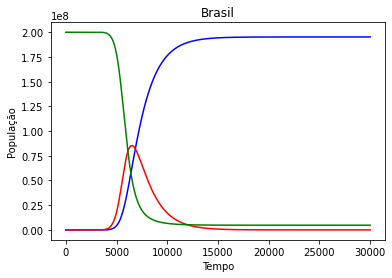

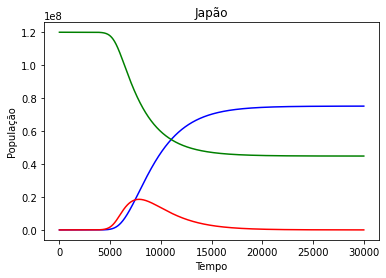

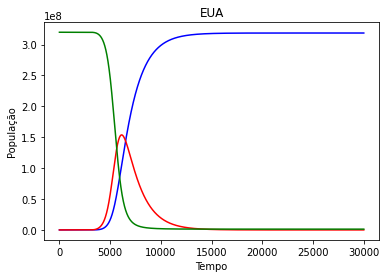

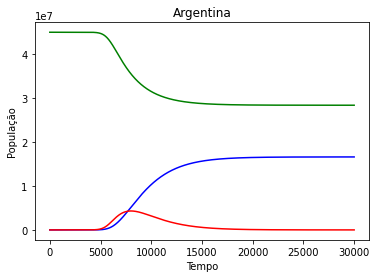

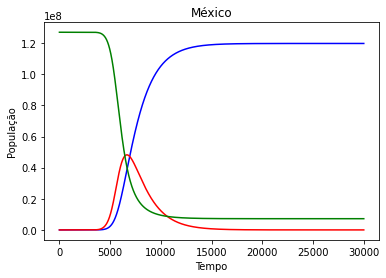

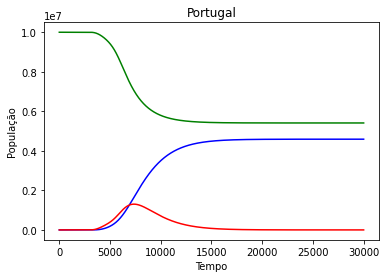

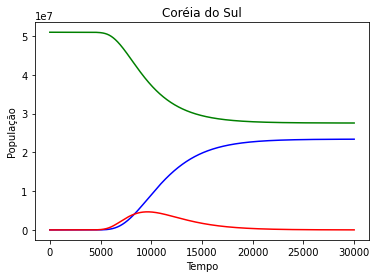

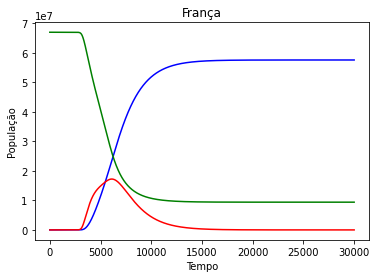

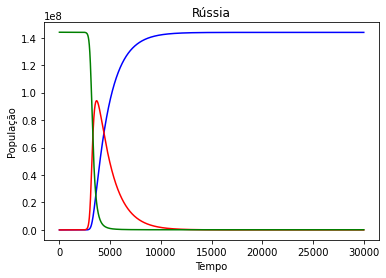

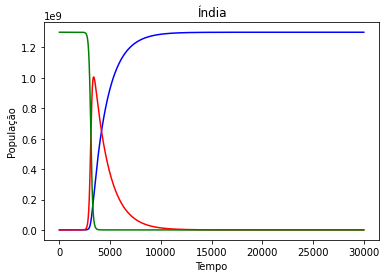

In [ ]:
offset = 0
resultados = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]

for i in range(10):
    plt.title(resultados[i].nome)
    plt.xlabel("Tempo")
    plt.ylabel("População")
    plt.plot(range(T+1-offset), resultados[i].R[offset:], c = 'b')
    plt.plot(range(T+1-offset), resultados[i].I[offset:], c = 'r')
    plt.plot(range(T+1-offset), resultados[i].S[offset:], c = 'g')
    plt.show()

Como esperado, países com maior população tiveram um número de infectados maior, e como no modelo a Índia é o país mais populoso, e está conectada somente à Rússia, esta última também teve um pico de infectados alto.

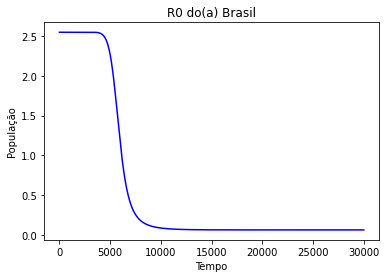

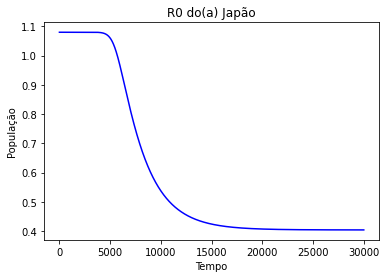

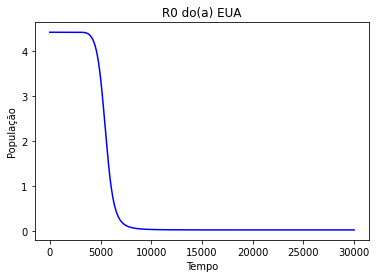

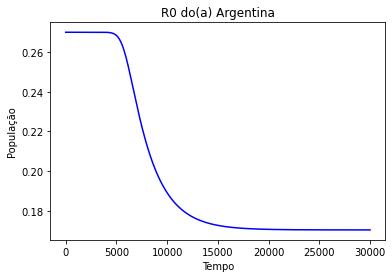

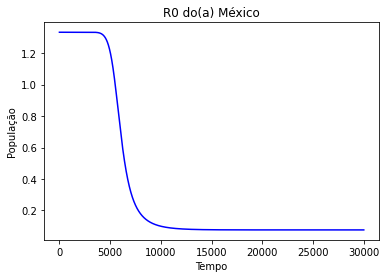

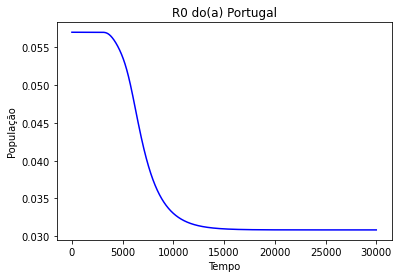

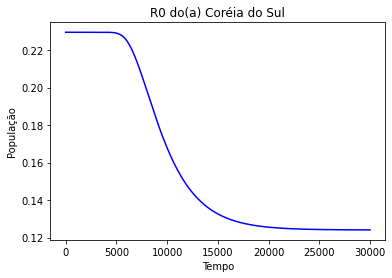

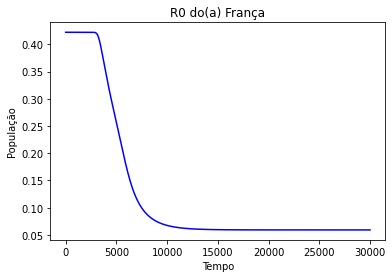

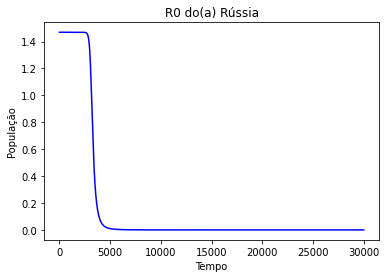

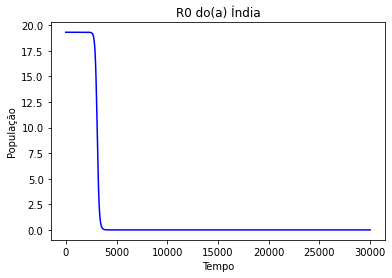

In [ ]:
for i in range(10):
    plt.title(f'R0 do(a) {resultados[i].nome}')
    plt.xlabel("Tempo")
    plt.ylabel("Valor")
    plt.plot(range(T+1-offset), resultados[i].ro[offset:], c = 'b')
    plt.show()

Da mesma forma, em países com com uma população maior, o R0 caiu de maneira mais abrupta, enquanto em países com menor população, e queda foi mais suave.

Agora, considerando o modelo estocástico, foi feita apenas a alteração nas probabilidades de propagação:

In [ ]:
# Inicializando as cidades
c1 = Covid(200000000, 1, 0.85*10**-9, "Brasil") # Brasil
c2 = Covid(120000000, 0, 0.6*10**-9, "Japão") # Japão
c3 = Covid(320000000, 0, 0.92*10**-9, "EUA") # EUA
c4 = Covid(45000000, 0, 0.4*10**-9, "Argentina")  # Argentina
c5 = Covid(127000000, 0, 0.7*10**-9, "México") # México
c6 = Covid(10000000, 0, 0.38*10**-9, "Portugal")  # Portugal
c7 = Covid(51000000, 0, 0.3*10**-9, "Coréia do Sul")  # Coréia do Sul
c8 = Covid(67000000, 0, 0.42*10**-9, "França")  # França
c9 = Covid(144000000, 0, 0.68*10**-9, "Rússia") # Rússia
c10 = Covid(1300000000, 0, 0.99*10**-9, "Índia") # Índia

In [ ]:
for i in range(T):
    prob = {
        "jba": rand.random(),
        "jbe": rand.random(),
        "jbp": rand.random(),
        "jem": rand.random(),
        "jef": rand.random(),
        "jej": rand.random(),
        "jpf": rand.random(),
        "jfr": rand.random(),
        "jri": rand.random(),
        "jjc": rand.random(), 
    }
    sAtual = [c1.S[i], c2.S[i], c3.S[i], c4.S[i], c5.S[i], c6.S[i], c7.S[i], c8.S[i], c9.S[i], c10.S[i]]
    iAtual = [c1.I[i], c2.I[i], c3.I[i], c4.I[i], c5.I[i], c6.I[i], c7.I[i], c8.I[i], c9.I[i], c10.I[i]]
    rAtual = [c1.R[i], c2.R[i], c3.R[i], c4.R[i], c5.R[i], c6.R[i], c7.R[i], c8.R[i], c9.R[i], c10.R[i]]

    # Brasil
    c1.deltaS(sAtual[0], iAtual[0], iAtual[3], iAtual[2], iAtual[5], funcao=fc1[0])
    c1.deltaI(sAtual[0], iAtual[0], iAtual[3], iAtual[2], iAtual[5], funcao=fc1[1])
    c1.deltaR(iAtual[0], rAtual[0], funcao=fc1[2])

    # Japão
    c2.deltaS(sAtual[1], iAtual[1], iAtual[2], iAtual[6], funcao=fc2[0])
    c2.deltaI(sAtual[1], iAtual[1], iAtual[2], iAtual[6], funcao=fc2[1])
    c2.deltaR(iAtual[1], rAtual[1], funcao=fc2[2])

    # EUA
    c3.deltaS(sAtual[2], iAtual[2], iAtual[4], iAtual[0], iAtual[7], iAtual[1], funcao=fc3[0])
    c3.deltaI(sAtual[2], iAtual[2], iAtual[4], iAtual[0], iAtual[7], iAtual[1], funcao=fc3[1])
    c3.deltaR(iAtual[2], rAtual[2], funcao=fc3[2])

    # Argentina
    c4.deltaS(sAtual[3], iAtual[3], iAtual[0], funcao=fc4[0])
    c4.deltaI(sAtual[3], iAtual[3], iAtual[0], funcao=fc4[1])
    c4.deltaR(iAtual[3], rAtual[3], funcao=fc4[2])

    # México
    c5.deltaS(sAtual[4], iAtual[4], iAtual[2], funcao=fc5[0])
    c5.deltaI(sAtual[4], iAtual[4], iAtual[2], funcao=fc5[1])
    c5.deltaR(iAtual[4], rAtual[4], funcao=fc5[2])

    # Portugal
    c6.deltaS(sAtual[5], iAtual[5], iAtual[0], iAtual[7], funcao=fc6[0])
    c6.deltaI(sAtual[5], iAtual[5], iAtual[0], iAtual[7], funcao=fc6[1])
    c6.deltaR(iAtual[5], rAtual[5], funcao=fc6[2])

    # Coréia do Sul
    c7.deltaS(sAtual[6], iAtual[6], iAtual[1], funcao=fc7[0])
    c7.deltaI(sAtual[6], iAtual[6], iAtual[1], funcao=fc7[1])
    c7.deltaR(iAtual[6], rAtual[6], funcao=fc7[2])

    # França
    c8.deltaS(sAtual[7], iAtual[7], iAtual[2], iAtual[5], iAtual[8], funcao=fc8[0])
    c8.deltaI(sAtual[7], iAtual[7], iAtual[2], iAtual[5], iAtual[8], funcao=fc8[1])
    c8.deltaR(iAtual[7], rAtual[7], funcao=fc8[2])

    # Rússia
    c9.deltaS(sAtual[8], iAtual[8], iAtual[7], iAtual[9], funcao=fc9[0])
    c9.deltaI(sAtual[8], iAtual[8], iAtual[7], iAtual[9], funcao=fc9[1])
    c9.deltaR(iAtual[8], rAtual[8], funcao=fc9[2])

    # Índia
    c10.deltaS(sAtual[9], iAtual[9], iAtual[8], funcao=fc10[0])
    c10.deltaI(sAtual[9], iAtual[9], iAtual[8], funcao=fc10[1])
    c10.deltaR(iAtual[9], rAtual[9], funcao=fc10[2])

In [ ]:
offset = 0
resultados = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]

for i in range(10):
    plt.title(resultados[i].nome)
    plt.xlabel("Tempo")
    plt.ylabel("População")
    plt.plot(range(T+1-offset), resultados[i].R[offset:], c = 'b')
    plt.plot(range(T+1-offset), resultados[i].I[offset:], c = 'r')
    plt.plot(range(T+1-offset), resultados[i].S[offset:], c = 'g')
    plt.show()

In [ ]:
for i in range(10):
    plt.title(f'R0 do(a) {resultados[i].nome}')
    plt.xlabel("Tempo")
    plt.ylabel("Valor")
    plt.plot(range(T+1-offset), resultados[i].ro[offset:], c = 'b')
    plt.show()

E nessa simulação, como visto pelos gráficos, a velocidade de propagação, bem como os picos de infectados foi consideravelmente menor, uma vez que os parâmetros de probabilidades agora não são sempre um.